In [1]:
import _sqlite3
import pandas as pd
import numpy as np

cnx = _sqlite3.connect("corpus.sqlite3")

In [2]:
comments_df = pd.read_sql_query("Select ID_Post, Headline, Body, Status FROM Posts",cnx)
labels_df = pd.read_sql_query("SELECT * From Annotations_consolidated",cnx) 

In [3]:
labels = ["ArgumentsUsed","Discriminating","Inappropriate","OffTopic","PersonalStories","PossiblyFeedback","SentimentNegative","SentimentNeutral","SentimentPositive"]

label_map = {y:x for (x,y) in enumerate(labels)}

In [4]:
labels_df.value_counts("ID_Post").isin([9])

ID_Post
432258      True
136446      True
136458      True
136457      True
136456      True
           ...  
17999      False
18001      False
18006      False
18007      False
1010997    False
Length: 11773, dtype: bool

In [5]:
index_values_of_9_label_posts = labels_df.value_counts("ID_Post")[labels_df.value_counts("ID_Post").isin([9])].index
len(index_values_of_9_label_posts)

3599

In [6]:
# Die Kommentare, für die alle 9 Labels annotiert wurden:
comments_filtered_df =comments_df.loc[index_values_of_9_label_posts]
comments_filtered_df

,ID_Post,Headline,Body,Status
ID_Post,,,,
432258,432259,None,"Das kann man nur mutmaßen, aber nicht erkennen...",online
136446,136447,None,Sorry für die verursachte Mühe der Löschungen.,deleted
136458,136459,None,"Witzig, dass der Poster selber nicht widerspro...",online
136457,136458,None,Foggwulf und Mouilly haben es Ihnen ja schon e...,online
136456,136457,None,"was auch erklärt, warum körperlich schwächere ...",online
...,...,...,...,...
875899,875900,None,Das beste Mittel gegen die angebliche Hetze si...,deleted
875937,875938,None,Frankreich und Portugal haben ihnen angeboten ...,deleted
875900,875901,Video an sehen,die Stinkefinger sind schon ausgefahren.... \r...,deleted


In [7]:
# Anfügen der Spalten für jedes Label in comments_filtered_df
for label in labels:
    comments_filtered_df[label] = labels_df["Category"]

In [8]:
# Setzen der Labels in comments_filtered_df
index_values = set(index_values_of_9_label_posts)
for index,row in labels_df.iterrows():
    if row["ID_Post"] in index_values:
        
        #cur_label = label_map[row["Category"]]
        #cur_label_value = row["Value"]
        if row["Value"] == 1:
            comments_filtered_df.at[row["ID_Post"], row["Category"]] = row["Category"] #alter stand nur dise zeile =row["Value"]
        elif row["Value"] == 0:
            comments_filtered_df.at[row["ID_Post"], row["Category"]] = ''
        else:
            comments_filtered_df.at[row["ID_Post"], row["Category"]] = "xxxxxxxxx"

In [9]:
#Connecting header to body
comments_filtered_df['HeadBody'] = comments_filtered_df['Headline'].astype(str) +'###'+ comments_filtered_df['Body']
comments_filtered_df['HeadBody'] = comments_filtered_df['HeadBody'].replace('###', ' ', regex=True)
comments_filtered_df['HeadBody'] = comments_filtered_df['HeadBody'].replace("None", '', regex=True)

In [10]:
#Drop the ID_Post-column
comments_filtered_df=comments_filtered_df.drop("ID_Post",axis=1)

In [11]:
#Creating Multi label column for Multi label classifier

#testo = comments_filtered_df
#testo["all_labels"] = ""
comments_filtered_df["all_labels"]=""
p = []
m = []
labelss = ["deleted", "online", "ArgumentsUsed","Discriminating","Inappropriate","OffTopic","PersonalStories","PossiblyFeedback","SentimentNegative","SentimentNeutral","SentimentPositive"]
for index, row in comments_filtered_df.iterrows():
        
        if row["Status"] in labelss:
            x = row["Status"]
            p.append(x)

            
        if row["ArgumentsUsed"] in labelss:
            x = row["ArgumentsUsed"]
            p.append(x)

            
        if row["Discriminating"] in labelss:
            x = row["Discriminating"]
            p.append(x)

            
        if row["Inappropriate"] in labelss:
            x = row["Inappropriate"]
            p.append(x)

            
        if row["OffTopic"] in labelss:
            x = row["OffTopic"]
            p.append(x)

            
        if row["PersonalStories"] in labelss:
            x = row["PersonalStories"]
            p.append(x)

            
        if row["PossiblyFeedback"] in labelss:
            x = row["PossiblyFeedback"]
            p.append(x)

            
        if row["SentimentNegative"] in labelss:
            x = row["SentimentNegative"]
            p.append(x)


                        
        if row["SentimentNeutral"] in labelss:
            x = row["SentimentNeutral"]
            p.append(x)

            
        if row["SentimentPositive"] in labelss:
            x = row["SentimentPositive"]
            p.append(x)

        
        row["all_labels"] = p
        p =[]

In [12]:
#pritn df to csv for storage
#comments_filtered_df.to_csv('dfxx.csv',sep="\t")

In [13]:
comments_filtered_df

,Headline,Body,Status,ArgumentsUsed,Discriminating,Inappropriate,OffTopic,PersonalStories,PossiblyFeedback,SentimentNegative,SentimentNeutral,SentimentPositive,HeadBody,all_labels
ID_Post,,,,,,,,,,,,,,
432258,None,"Das kann man nur mutmaßen, aber nicht erkennen...",online,,,,,,,,SentimentNeutral,,"Das kann man nur mutmaßen, aber nicht erkenne...","[online, SentimentNeutral]"
136446,None,Sorry für die verursachte Mühe der Löschungen.,deleted,,,,,,,SentimentNegative,,,Sorry für die verursachte Mühe der Löschungen.,"[deleted, SentimentNegative]"
136458,None,"Witzig, dass der Poster selber nicht widerspro...",online,,,,OffTopic,,,,SentimentNeutral,,"Witzig, dass der Poster selber nicht widerspr...","[online, OffTopic, SentimentNeutral]"
136457,None,Foggwulf und Mouilly haben es Ihnen ja schon e...,online,ArgumentsUsed,,,,,,,SentimentNeutral,,Foggwulf und Mouilly haben es Ihnen ja schon ...,"[online, ArgumentsUsed, SentimentNeutral]"
136456,None,"was auch erklärt, warum körperlich schwächere ...",online,ArgumentsUsed,,,,,,,SentimentNeutral,,"was auch erklärt, warum körperlich schwächere...","[online, ArgumentsUsed, SentimentNeutral]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875899,None,Das beste Mittel gegen die angebliche Hetze si...,deleted,,,,,,,SentimentNegative,,,Das beste Mittel gegen die angebliche Hetze s...,"[deleted, SentimentNegative]"
875937,None,Frankreich und Portugal haben ihnen angeboten ...,deleted,,,,,,,SentimentNegative,,,Frankreich und Portugal haben ihnen angeboten...,"[deleted, SentimentNegative]"
875900,Video an sehen,die Stinkefinger sind schon ausgefahren.... \r...,deleted,,,,,,,SentimentNegative,,,Video an sehen die Stinkefinger sind schon aus...,"[deleted, SentimentNegative]"


In [14]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [15]:
meta = comments_filtered_df

In [16]:
#meta['ID_Post'] = meta['ID_Post'].astype(str)
meta['HeadBody'] = meta['HeadBody'].astype(str)

In [17]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [18]:
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("german")
stop_words = set(stopwords.words("german"))


def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]
    words_filtered = words_tokens_lower
    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tariki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tariki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
meta['cleantext'] = meta['HeadBody'].apply(lambda x: clean_text(x))

In [20]:
meta['cleantext'] = meta['HeadBody'].apply(lambda x: clean_text(x))

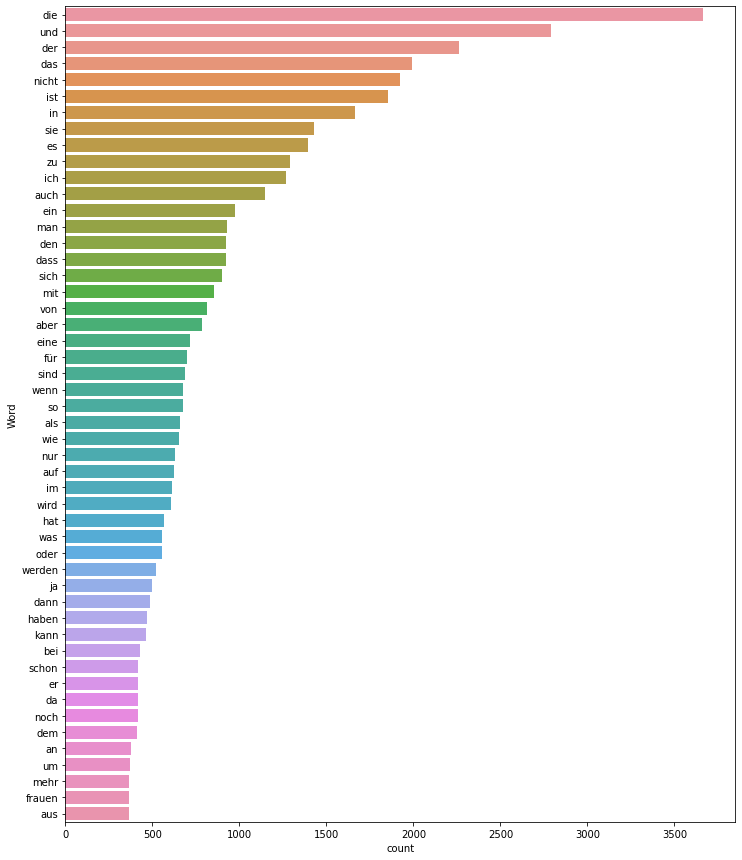

In [21]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

#print 50 most frequent words 
freq_words(meta['cleantext'], 50)

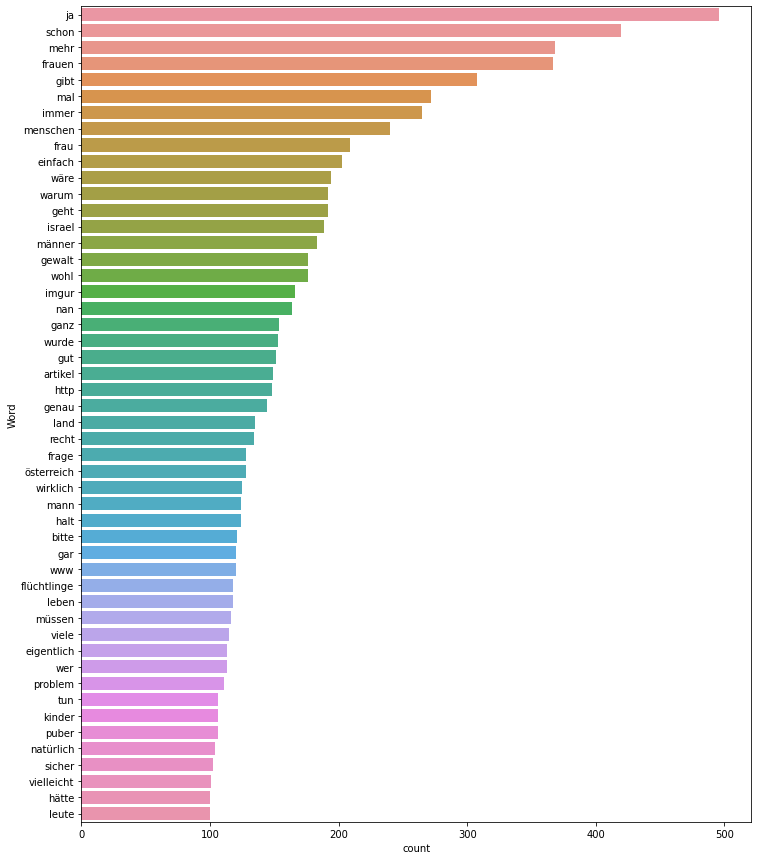

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('german'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

meta['cleantext'] = meta['cleantext'].apply(lambda x: remove_stopwords(x))
freq_words(meta['cleantext'], 50)

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(comments_filtered_df['all_labels'])
print(multilabel_binarizer.classes_)

# transform target variable
y = multilabel_binarizer.transform(meta['all_labels'])

['ArgumentsUsed' 'Discriminating' 'Inappropriate' 'OffTopic'
 'PersonalStories' 'PossiblyFeedback' 'SentimentNegative'
 'SentimentNeutral' 'SentimentPositive' 'deleted' 'online']


In [43]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=500)

In [44]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(meta['cleantext'], y, test_size=0.3, random_state=9)

In [45]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [46]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [47]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [48]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [49]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [50]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.5163853028798412

In [51]:
from sklearn.metrics import classification_report

label_names = ["deleted", "online", "ArgumentsUsed","Discriminating","Inappropriate","OffTopic","PersonalStories","PossiblyFeedback","SentimentNegative","SentimentNeutral","SentimentPositive"]

print(classification_report(yval, y_pred,target_names=label_names))

                   precision    recall  f1-score   support

          deleted       0.28      0.03      0.06       318
           online       0.00      0.00      0.00        84
    ArgumentsUsed       0.00      0.00      0.00        96
   Discriminating       0.50      0.01      0.01       176
    Inappropriate       0.00      0.00      0.00        16
         OffTopic       0.00      0.00      0.00        22
  PersonalStories       0.53      0.48      0.50       484
 PossiblyFeedback       0.60      0.62      0.61       585
SentimentNegative       0.00      0.00      0.00        11
 SentimentNeutral       0.48      0.21      0.29       377
SentimentPositive       0.67      0.88      0.76       703

        micro avg       0.60      0.45      0.52      2872
        macro avg       0.28      0.20      0.20      2872
     weighted avg       0.50      0.45      0.44      2872
      samples avg       0.60      0.48      0.52      2872



C:\ProgramData\Anaconda3\envs\intro2nlp\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [53]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [54]:
for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Kommentar: ", meta['HeadBody'][k], "\nPredicted Label: ", infer_tags(xval[k])), print("Actual Label: ",meta['all_labels'][k], "\n")

Kommentar:  Das ist einfach nur deren Hausrecht, die können da löschen und stehen lassen, was ihnen passt. Das ist einfach nur EIN Ort im Internet, wo es unendlich viele Orte geben kann an denen man seine Meinung verbreiten kann.

Der Zugriff auf derstandard ist kein Grundrecht, d.h. selbst wenn man dort für das Posten von nun unerlaubten Beiträgen gebannt würde, so verliert man so ziemlich gar nichts von Bedeutung.

Man kann sich sogar sofort eine eigene Webseite erstellen und seine Meinung dort posten und derstandard kann (und will) daran auch gar nichts ändern/verhindern.

Das Grundrecht auf Meinungsfreiheit ist keine Pflicht für Unternehmen jedem Menschen eine Plattform zur Verbreitung jeder Meinung zur Verfügung stellen zu müssen!
Und es gilt nur gegenüber dem Staat. 
Predicted Label:  [('SentimentNeutral', 'online')]
Actual Label:  ['online', 'SentimentNeutral'] 

Kommentar:  nan 
Predicted Label:  [('SentimentNeutral', 'deleted')]
Actual Label:  ['deleted', 'SentimentNeutral'] 


In [55]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [56]:
#calculating f-score for different threshold of log regression
t=0
while t <= 1:
    y_pred_new = (y_pred_prob >= t).astype(int)
    
    # evaluate performance
    print("F-Score: ", f1_score(yval, y_pred_new, average="micro"), "Threshold: ", t)
    t = t+0.1 # threshold value


F-Score:  0.38937093275488066 Threshold:  0
F-Score:  0.5513007284079083 Threshold:  0.1
F-Score:  0.5886792452830188 Threshold:  0.2
F-Score:  0.5958768709404123 Threshold:  0.30000000000000004
F-Score:  0.5756873136800265 Threshold:  0.4
F-Score:  0.5163853028798412 Threshold:  0.5
F-Score:  0.3963178294573643 Threshold:  0.6
F-Score:  0.2224168126094571 Threshold:  0.7
F-Score:  0.05945223780895124 Threshold:  0.7999999999999999
F-Score:  0.0013917884481558804 Threshold:  0.8999999999999999
F-Score:  0.0 Threshold:  0.9999999999999999


In [57]:
t = 0.3 # threshold value with max F-Score
y_pred_new = (y_pred_prob >= t).astype(int)

In [58]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5958768709404123

In [59]:
from sklearn.metrics import classification_report

label_names = ["deleted", "online", "ArgumentsUsed","Discriminating","Inappropriate","OffTopic","PersonalStories","PossiblyFeedback","SentimentNegative","SentimentNeutral","SentimentPositive"]

print(classification_report(yval, y_pred_new,target_names=label_names))



                   precision    recall  f1-score   support

          deleted       0.30      0.39      0.34       318
           online       0.00      0.00      0.00        84
    ArgumentsUsed       0.00      0.00      0.00        96
   Discriminating       0.36      0.11      0.17       176
    Inappropriate       0.00      0.00      0.00        16
         OffTopic       0.00      0.00      0.00        22
  PersonalStories       0.46      0.93      0.61       484
 PossiblyFeedback       0.55      0.95      0.70       585
SentimentNegative       0.00      0.00      0.00        11
 SentimentNeutral       0.39      0.71      0.50       377
SentimentPositive       0.65      0.99      0.79       703

        micro avg       0.50      0.73      0.60      2872
        macro avg       0.25      0.37      0.28      2872
     weighted avg       0.46      0.73      0.55      2872
      samples avg       0.51      0.77      0.60      2872



C:\ProgramData\Anaconda3\envs\intro2nlp\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
